Forest Health and Fire Risk Analysis using Machine Learning and Spatial Analysis

This project explores environmental factors affecting tree health and fire risk.
I will use various data exploration, visualization, and machine learning techniques to develop models that predict tree health status and fire risk index for conservation and forest management applications.

1. Importing necessary libraries

In [16]:
# Import necessary libraries for data manipulation, visualization, and machine learning

import pandas as pd               # For data manipulation
import numpy as np                # For numerical operations
import matplotlib.pyplot as plt   # For creating static plots
import seaborn as sns             # For advanced data visualization
from sklearn.preprocessing import StandardScaler   # For data standardization
from sklearn.decomposition import PCA              # For dimensionality reduction
from sklearn.model_selection import train_test_split, RandomizedSearchCV   # For splitting and tuning
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor   # Models for classification and regression
from sklearn.metrics import classification_report, mean_squared_error, ConfusionMatrixDisplay  # Model evaluation metrics
import joblib                     # For saving models
from yellowbrick.model_selection import FeatureImportances  # For model interpretation as SHAP alternative
import folium                     # For geospatial visualization as GeoPandas alternative

# Load the datasets from specified paths
data_1 = pd.read_csv("D:/MS IT/Big data/D & HD/forest_health_data.csv")  # Load first dataset without target variables
data_2 = pd.read_csv("D:/MS IT/Big data/D & HD/forest_health_data_with_target.csv")  # Load second dataset with target variables

# Display structure and information about both datasets to understand their composition
print("Dataset 1 Info:")
print(data_1.info())  # Prints data types, non-null counts, and memory usage in data_1
print("\nDataset 2 Info:")
print(data_2.info())  # Prints data types, non-null counts, and memory usage in data_2

Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Plot_ID                  1000 non-null   int64  
 1   Latitude                 1000 non-null   float64
 2   Longitude                1000 non-null   float64
 3   DBH                      1000 non-null   float64
 4   Tree_Height              1000 non-null   float64
 5   Crown_Width_North_South  1000 non-null   float64
 6   Crown_Width_East_West    1000 non-null   float64
 7   Slope                    1000 non-null   float64
 8   Elevation                1000 non-null   float64
 9   Soil_TN                  1000 non-null   float64
 10  Soil_TP                  1000 non-null   float64
 11  Soil_AP                  1000 non-null   float64
 12  Soil_AN                  1000 non-null   float64
 13  Menhinick_Index          1000 non-null   float64
 14  Gleason_I

In [19]:
data_1.head()

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
0,1,24.981605,-117.040695,29.862040,20.835684,6.147963,4.542720,29.171563,212.518419,0.723065,0.457221,0.189952,0.268850,2.135766,4.897271,0.073175,0.499670,Healthy
1,2,48.028572,-92.066934,28.462986,24.307079,8.248891,5.260921,7.757386,641.640332,0.690410,0.265053,0.169791,0.073260,0.700081,1.068692,0.089478,0.746747,Unhealthy
2,3,39.279758,-68.893791,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,0.104797,0.363831,0.092196,0.297665,1.105825,4.790607,0.651974,0.562667,Unhealthy
3,4,33.946339,-78.744258,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,0.923347,0.220844,0.305597,0.160819,2.434198,2.474710,0.486941,0.083303,Sub-Healthy
4,5,16.240746,-73.540720,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,0.572787,0.316867,0.240929,0.030913,1.821715,1.040362,0.790415,0.185580,Unhealthy


In [20]:
data_2.head()

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
0,1,24.981605,-117.040695,29.862040,20.835684,6.147963,4.542720,29.171563,212.518419,30.209377,93.086241,0.379904,0.268850,0.328882,0.487287,0.682938,2.998681,0.004402,0.812948,Healthy
1,2,48.028572,-92.066934,28.462986,24.307079,8.248891,5.260921,7.757386,641.640332,29.054905,62.028839,0.339583,0.073260,0.044616,0.013501,0.723696,3.986987,0.000330,0.678542,Very Healthy
2,3,39.279758,-68.893791,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,8.351397,77.992822,0.184392,0.297665,0.124953,0.474088,2.129934,3.250667,0.472263,0.889075,Healthy
3,4,33.946339,-78.744258,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,37.290034,54.883864,0.611194,0.160819,0.387971,0.187495,1.717352,1.333210,0.029294,0.449336,Unhealthy
4,5,16.240746,-73.540720,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,24.896527,70.402766,0.481858,0.030913,0.266699,0.009995,2.476038,1.742321,0.974533,0.893890,Unhealthy


2. Data Exploration and Basic Visualizations

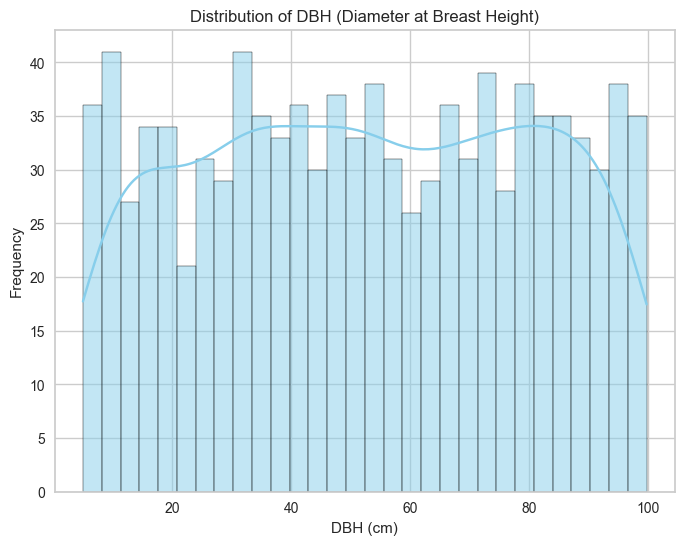

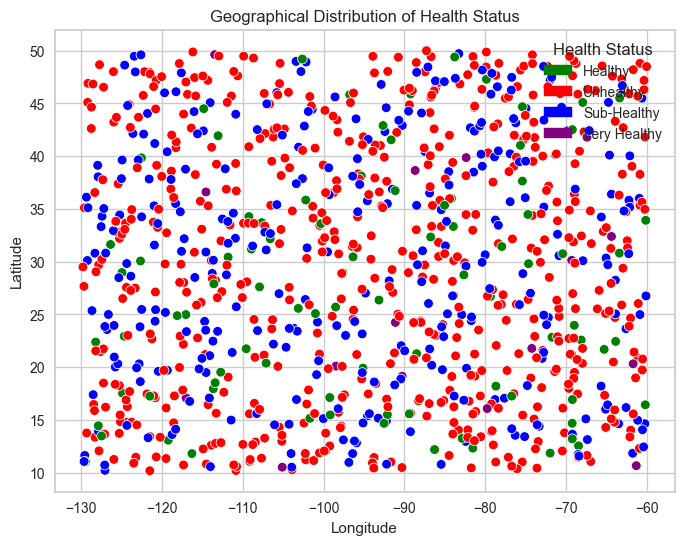

In [24]:
# Plot histogram of DBH (Diameter at Breast Height) distribution
plt.figure(figsize=(8, 6))  # Set plot size
sns.histplot(data_1['DBH'], kde=True, bins=30, color='skyblue')  # Histogram with KDE for smooth curve
plt.title('Distribution of DBH (Diameter at Breast Height)')  # Set plot title
plt.xlabel('DBH (cm)')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis
plt.show()  # Display plot

# Plot scatter of Latitude vs. Longitude to show health status by location
plt.figure(figsize=(8, 6))  # Set plot size

# Scatter plot with specific colors assigned to each health status
sns.scatterplot(x='Longitude', y='Latitude', hue='Health_Status', data=data_1,
                palette={'Healthy': 'green', 'Unhealthy': 'red', 'Sub-Healthy': 'blue', 'Very Healthy': 'purple'})

plt.title('Geographical Distribution of Health Status')  # Set plot title
plt.xlabel('Longitude')  # Label x-axis
plt.ylabel('Latitude')   # Label y-axis

# Remove the default legend
plt.legend([], [], frameon=False)

# Manually create a custom legend with color labels
import matplotlib.patches as mpatches

# Define color patches for each health status
healthy_patch = mpatches.Patch(color='green', label='Healthy')
unhealthy_patch = mpatches.Patch(color='red', label='Unhealthy')
subhealthy_patch = mpatches.Patch(color='blue', label='Sub-Healthy')
veryhealthy_patch = mpatches.Patch(color='purple', label='Very Healthy')

# Add the custom legend to the plot
plt.legend(handles=[healthy_patch, unhealthy_patch, subhealthy_patch, veryhealthy_patch],
           title='Health Status', loc='upper right')

plt.show()  # Display plot

3. Data Preprocessing and Feature Engineering

In [25]:
# Convert 'Health_Status' to numeric for model training (0 for Healthy, 1 for Unhealthy)
data_1['Health_Status'] = data_1['Health_Status'].map({'Healthy': 0, 'Unhealthy': 1})
data_2['Health_Status'] = data_2['Health_Status'].map({'Healthy': 0, 'Unhealthy': 1})

# Select features for analysis and target variable
X = data_1.drop(columns=['Health_Status', 'Plot_ID', 'Latitude', 'Longitude'])  # Features for model training
y = data_1['Health_Status']  # Target variable

# Scale the features to improve model performance, especially for distance-based models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4. Dimensionality Reduction with PCA

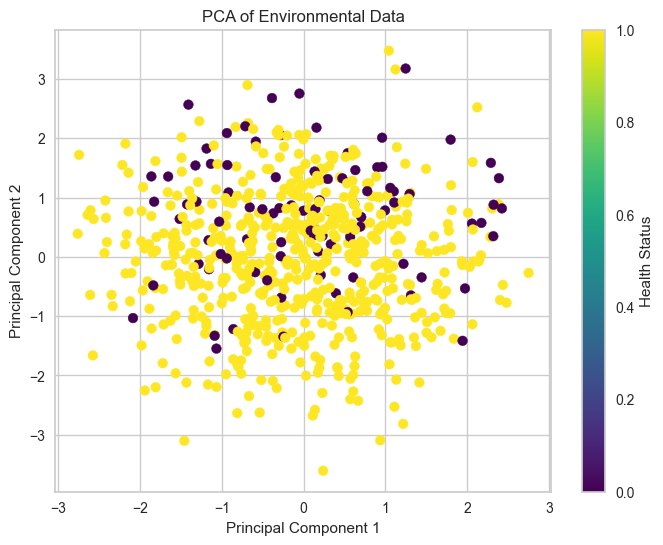

In [27]:
# Apply PCA to reduce to 2 components for visualization of high-dimensional data
pca = PCA(n_components=2)  # Initialize PCA with 2 components (reducing the feature space to 2 dimensions)
X_pca = pca.fit_transform(X_scaled)  # Fit PCA to scaled data and transform it to get the 2 principal components

# Plot the first two principal components to visualize clusters or patterns
plt.figure(figsize=(8, 6))  # Set figure size for the plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')  # Scatter plot of the 2 principal components with color indicating Health Status
plt.xlabel("Principal Component 1")  # Label x-axis as Principal Component 1
plt.ylabel("Principal Component 2")  # Label y-axis as Principal Component 2
plt.title("PCA of Environmental Data")  # Set the title for the plot
plt.colorbar(label='Health Status')  # Add a color bar to show the Health Status gradient
plt.show()  # Display the plot


5. Model Training and Evaluation

Missing values in y: 330
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00       173

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



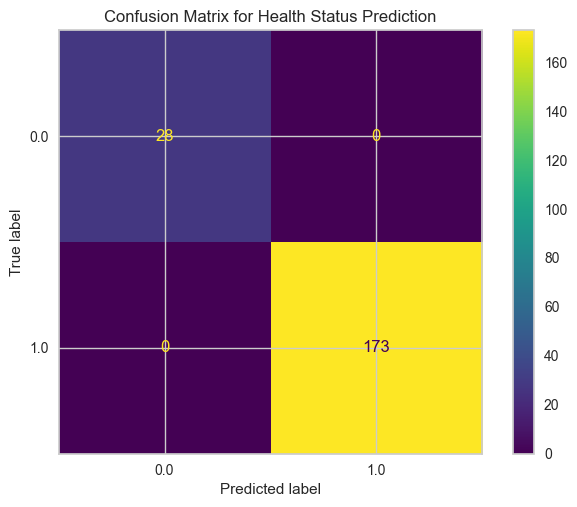

In [29]:
# Check if there are any NaN values in the target variable
print("Missing values in y:", y.isna().sum())

# Drop rows with NaN values in y
data_1 = data_1.dropna(subset=['Health_Status'])  # Adjust to your actual data if needed

# Re-define X and y after removing NaN values
X = data_1.drop(columns=['Health_Status', 'Plot_ID', 'Latitude', 'Longitude'])
y = data_1['Health_Status']

# Scale the features again if needed
X_scaled = scaler.fit_transform(X)

# Now split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier for predicting Health Status
model = RandomForestClassifier(random_state=42)  # Initialize model
model.fit(X_train, y_train)  # Fit model to training data

# Predict on test set and evaluate using classification metrics
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))  # Print precision, recall, and F1-score

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix for Health Status Prediction")
plt.show()


Classification Report on Test Data:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00       173

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



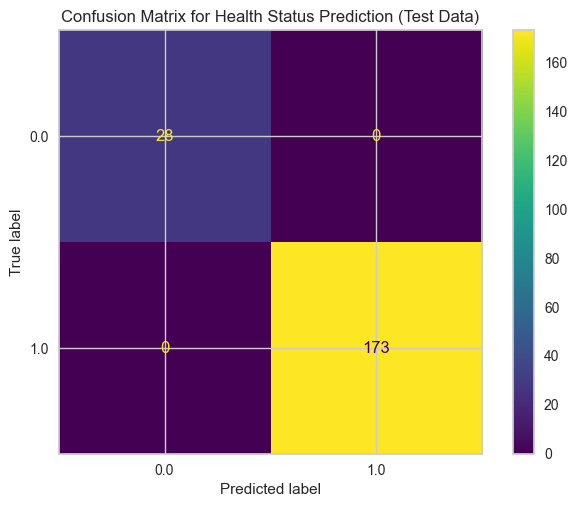

In [35]:
# Use the trained classifier to make predictions on the test set
y_pred_test = model.predict(X_test)

# Evaluate the classification model using metrics on the test data
print("Classification Report on Test Data:\n", classification_report(y_test, y_pred_test))

# Display confusion matrix for test data predictions
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix for Health Status Prediction (Test Data)")
plt.show()

 6. Feature Importance Visualization with Yellowbrick

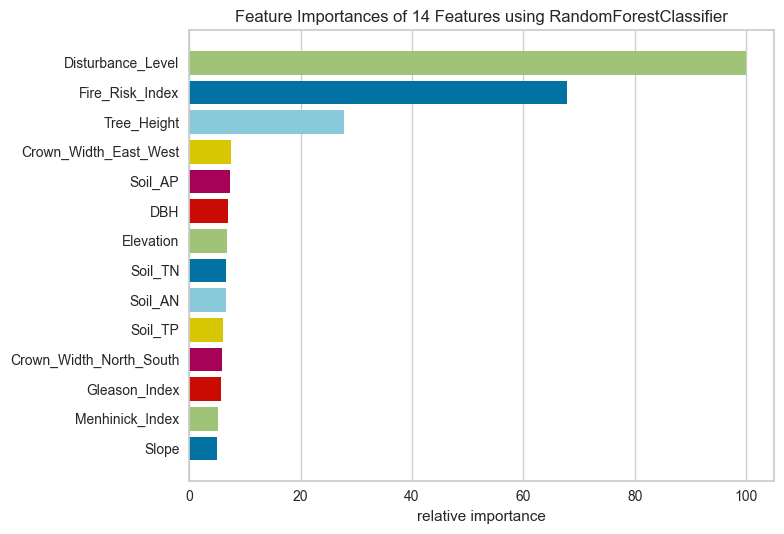

<Axes: title={'center': 'Feature Importances of 14 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [30]:
# Visualize feature importances using Yellowbrick
visualizer = FeatureImportances(model, labels=X.columns)  # Visualizer with feature labels
visualizer.fit(X_train, y_train)  # Fit visualizer on training data
visualizer.show()  # Display the plot

7. Regression Model for Fire Risk Prediction

In [32]:
# Define the target variable for regression
y_fire_risk = data_1['Fire_Risk_Index']  # Target variable for Fire Risk Prediction

# Split data for regression model, ensuring Fire Risk Index aligns with features
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_fire_risk, test_size=0.3, random_state=42)

# Train a Gradient Boosting Regressor for predicting Fire Risk Index
regressor = GradientBoostingRegressor(random_state=42)  # Initialize the regressor model
regressor.fit(X_train_reg, y_train_reg)  # Train the model on training features and Fire Risk target

# Predict Fire Risk Index on test data and evaluate with Mean Squared Error (MSE)
fire_risk_pred = regressor.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, fire_risk_pred)  # Calculate MSE on the test set
print(f"Mean Squared Error for Fire Risk Model: {mse}")


Mean Squared Error for Fire Risk Model: 5.970734600789744e-06


In [36]:
# Use the trained regressor to predict Fire Risk Index on the test set
fire_risk_pred_test = regressor.predict(X_test_reg)

# Evaluate the regression model using Mean Squared Error (MSE) and R-squared
mse_test = mean_squared_error(y_test_reg, fire_risk_pred_test)  # Calculate MSE
r2_test = regressor.score(X_test_reg, y_test_reg)  # Calculate R-squared
print(f"Mean Squared Error on Test Data: {mse_test}")
print(f"R-squared on Test Data: {r2_test}")

Mean Squared Error on Test Data: 5.970734600789744e-06
R-squared on Test Data: 0.9999383706833671


8. Geospatial Visualization with Folium

In [34]:
# Center the map on the mean latitude and longitude of plots
map_center = [data_1['Latitude'].mean(), data_1['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=6)  # Initialize map

# Add markers for each plot location with Health Status in popup
for _, row in data_1.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Health Status: {'Healthy' if row['Health_Status'] == 0 else 'Unhealthy'}"
    ).add_to(mymap)

# Save map to HTML file to view in browser
mymap.save("forest_health_map.html")